In [29]:
import tensorflow as tf

In [30]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
# TensorFlow Hello World 
import tensorflow as tf 
#sess = tf.Session() 
# This is only needed for TF 1.X 
# Computational Graph to be compiled and then run using the session 
a = tf.constant(10) 
b = tf.constant(32) 
# print(sess.run(a+b))  # Not session.run not needed in TF2.X
# In TF2.X eager execution compiles the computation graph in the background print(a+b) 
# TF 2.X is more direct. Just write a+b 
print(a)
print(a+b)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(42, shape=(), dtype=int32)


In [33]:
# Keras Hello World 
from keras.models  import Sequential 
from keras.layers import Dense 
# create model 
model = Sequential() 
model.add(Dense(12, input_dim=8, activation='relu')) # first layer has 12 neurons and expects 8 input variables
model.add(Dense(8, activation='relu')) # second hidden layer has 8 neurons
# Compile model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [34]:
model.summary() # print model summary

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                108       
                                                                 
 dense_41 (Dense)            (None, 8)                 104       
                                                                 
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                108       
                                                                 
 dense_41 (Dense)            (None, 8)                 104       
                                                                 
Total params: 212
Trainable params: 212
Non-trainable p

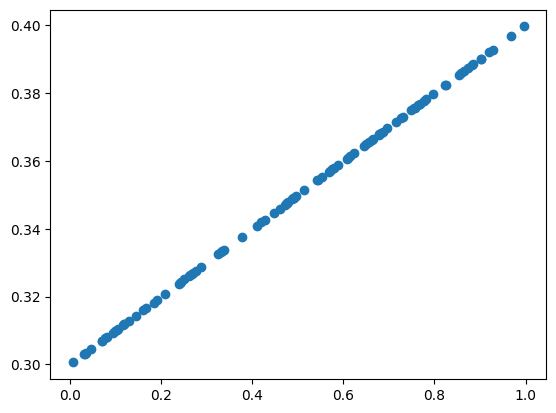

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.11291122], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
W: [0.09736326], b: [0.40256754]
W: [0.08771487], b: [0.30630633]
W: [0.09655088], b: [0.30177054]
W: [0.09903163], b: [0.3004971]
W: [0.09972813], b: [0.30013958]
W: [0.09992367], b: [0.3000392]
W: [0.09997856], b: [0.300011]
W: [0.099994], b: [0.3000031]
W: [0.09999831], b: [0.30000088]
W: [0.09999951], b: [0.30000025]


In [35]:
import numpy as np   
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3 
x_data = np.random.rand(100).astype(np.float32) 
y_data = x_data * 0.1 + 0.3   

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()

# Try to find values for W and b that compute y_data = W * x_data + b 
# (We know that W should be 0.1 and b 0.3, but Tensorflow will figure that out for us.) 
W = tf.Variable(tf.random.uniform(shape=(1,), minval=-1.0, maxval=1.0)) 
b = tf.Variable(tf.zeros(shape=(1,))) 

print(W)
print(b)

# Minimize the mean squared errors. 
def cost():     
    y = W * x_data + b     
    loss = tf.reduce_mean(tf.square(y - y_data))     
    return loss 

# SGD is the equivalent for GradientDescentOptimizer
optimizer = tf.optimizers.SGD(0.5)  

for e in range(200):     
    optimizer.minimize(cost, var_list=[W, b])     
    if e % 20 == 0:         
        print(f'W: {W.numpy()}, b: {b.numpy()}')  
        
# Learns best fit is W: [0.1], b: [0.3] 

In [36]:
from keras.models import Sequential 
from keras.layers import Dense 
# create model 
model = Sequential([ 
        Dense(12, input_dim=8, activation='relu'), 
        Dense(8, activation='relu'),             
        Dense(1, activation='sigmoid') 
]) 

## iris two class dataset 

In [37]:
# Keras version of Iris classifier 
from keras.models import Sequential 
from keras.layers import Dense 

from sklearn import datasets 
from sklearn import model_selection 
from sklearn import preprocessing 
import pandas as pd 
import numpy as np 

# loading and pre-processing of the data 
# We use the 2 class version of iris data set 
iris = pd.read_csv("IrisTwoClass.csv") 
x = np.array(iris.drop("Class",axis=1)) 
y = np.array(iris["Class"]) 

In [38]:
print(x.shape)
print(x)

(100, 4)
[[6.3 2.9 5.6 1.8]
 [4.8 3.4 1.6 0.2]
 [7.2 3.2 6.  1.8]
 [5.2 3.4 1.4 0.2]
 [6.7 3.1 5.6 2.4]
 [4.9 3.6 1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [5.3 3.7 1.5 0.2]
 [6.4 3.1 5.5 1.8]
 [6.1 2.6 5.6 1.4]
 [6.  3.  4.8 1.8]
 [6.  2.2 5.  1.5]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.3 0.4]
 [5.8 2.7 5.1 1.9]
 [4.8 3.  1.4 0.3]
 [5.1 3.7 1.5 0.4]
 [5.1 3.8 1.6 0.2]
 [5.  3.3 1.4 0.2]
 [7.6 3.  6.6 2.1]
 [4.6 3.2 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [7.7 2.6 6.9 2.3]
 [6.4 2.8 5.6 2.2]
 [4.3 3.  1.1 0.1]
 [7.1 3.  5.9 2.1]
 [5.4 3.4 1.5 0.4]
 [5.7 2.5 5.  2. ]
 [6.3 2.5 5.  1.9]
 [6.1 3.  4.9 1.8]
 [5.7 4.4 1.5 0.4]
 [7.7 2.8 6.7 2. ]
 [6.3 3.4 5.6 2.4]
 [5.8 2.7 5.1 1.9]
 [4.8 3.4 1.9 0.2]
 [6.2 3.4 5.4 2.3]
 [5.1 3.5 1.4 0.2]
 [7.4 2.8 6.1 1.9]
 [4.7 3.2 1.6 0.2]
 [4.9 3.1 1.5 0.2]
 [7.7 3.  6.1 2.3]
 [7.9 3.8 6.4 2. ]
 [6.9 3.2 5.7 2.3]
 [5.8 4.  1.2 0.2]
 [5.2 3.5 1.5 0.2]
 [6.4 2.7 5.3 1.9]
 [4.4 3.2 1.3 0.2]
 [5.  3.  1.6 0.2]
 [4.6 3.6 1.  0.2]
 [6.3 2.7 4.9 1.8]
 [6.3 3.3 6.  2.5]
 [5.1 3.8 1.5 0.3]
 [5

In [39]:
print(y.shape)
print(y)

(100,)
[1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1]


In [40]:
# Split dataset into train / test 
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# Scale data (training set) to 0 mean and unit standard deviation. 
scaler = preprocessing.StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test) 

(80, 4)
(20, 4)
(80,)
(20,)


In [41]:
print(x_train)

[[ 0.72103295 -1.03004748  1.08200425  1.10481261]
 [ 1.16135842 -0.54245104  1.03321037  1.10481261]
 [-0.37978071  0.43274184 -0.91854476 -0.76402464]
 [ 1.27143978 -0.0548546   1.13079813  1.32467581]
 [-1.04026891 -0.29865282 -0.86975088 -0.98388784]
 [-1.04026891 -0.54245104 -0.96733864 -0.87395624]
 [ 2.15209071 -0.54245104  1.32597364  1.32467581]
 [-0.59994345  2.13932938 -0.91854476 -1.09381945]
 [ 0.39078885 -1.51764392  1.08200425  0.33529139]
 [ 0.17062612 -0.54245104  0.83803486  0.7750178 ]
 [ 0.28070748 -2.4928368   0.78924098  0.44522299]
 [-0.82010618 -0.54245104 -0.86975088 -0.98388784]
 [-1.37051301 -2.24903858 -1.01613251 -0.87395624]
 [ 0.61095158 -1.76144214  0.78924098  0.8849494 ]
 [ 0.50087022 -1.03004748  0.69165322  0.7750178 ]
 [-0.93018755  0.92033828 -0.96733864 -1.09381945]
 [-0.82010618  0.43274184 -0.91854476 -0.98388784]
 [-0.71002481  0.18894362 -0.820957   -0.65409304]
 [ 0.50087022  0.43274184  0.98441649  1.32467581]
 [-0.71002481  1.1641365  -0.91

model using keras


In [45]:

# Import KerasClassifier from tensorflow.keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn  import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Creates a model given an activation and learning rate
def create_model(learning_rate = 0.1, activation = 'relu', optomizer = 'Adam'):
    # Create an Adam optimizer with the given learning rate
    # opt = optomizer(lr = learning_rate)
  	# Create model  
    model = Sequential() 
    model.add(Dense(10, input_dim=4, activation=activation)) 
    model.add(Dense(20, activation=activation)) 
    model.add(Dense(10, activation=activation)) 
    model.add(Dense(1, activation='sigmoid')) 
  	
  	# Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = optomizer, loss = 'binary_crossentropy' , metrics = ['accuracy'])
    return model


# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh','sigmoid'], 'batch_size': [32, 128, 256], 
          'epochs': [20,30,40,50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, x_test, y_test, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

C:\Users\p2300575\AppData\Local\Temp\ipykernel_24220\2327795621.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model)


1/1 [==============================] - 0s 120ms/step - loss: 1.1069 - accuracy: 0.5000
The mean accuracy was: 0.4523809552192688
With a standard deviation of: 0.0336717494780809


Epoch 1/20
3/3 [==============================] - 1s 76ms/step - loss: 0.7051 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 0.6953 - accuracy: 0.5625 - val_loss: 0.6827 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.6856 - accuracy: 0.6000 - val_loss: 0.6740 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6762 - accuracy: 0.6375 - val_loss: 0.6644 - val_accuracy: 0.8500
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 0.6658 - accuracy: 0.8000 - val_loss: 0.6546 - val_accuracy: 0.9500
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6540 - accuracy: 0.9250 - val_loss: 0.6445 - val_accuracy: 0.9500
Epoch 7/20
3/3 [==============================] - 0s 23ms/step - loss: 0.6417 - accuracy: 0.9375 - val_loss: 0.6338 - val_accuracy: 0.9500
Epoch 8/20
3/3 [===========

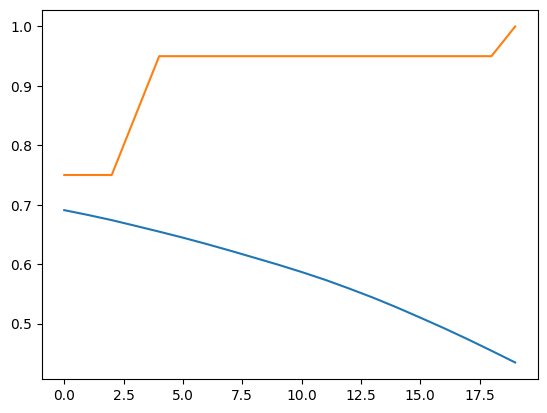

In [ ]:
# create model 
model = Sequential() 
model.add(Dense(10, input_dim=4, activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

# Compile model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Train your model and save its history
h_callback = model.fit(x_train, y_train, epochs = 20,
               validation_data=(x_test, y_test))

# Plot train vs test loss during training
plt.plot(h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plt.plot(h_callback.history['val_accuracy'])

# eval model 
scores = model.evaluate(x_test, y_test) 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions 
predictions = model.predict(x_test) 

# round predictions 
rounded = [round(x[0]) for x in predictions] 
print(rounded) 

# Display a summary of your model
model.summary()

model using keras functional api

In [ ]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model 

# This returns a tensor 
inputs = Input(shape=(4,)) 
print(inputs)

# a layer instance is callable on a tensor, and returns a tensor 
x = Dense(64, activation='relu')(inputs) 
x = Dense(64, activation='relu')(x) 
predictions = Dense(1, activation='sigmoid')(x) 

# This creates a model that includes 
# the Input layer and three Dense layers 
model = Model(inputs=inputs, outputs=predictions) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(x_train, y_train,epochs=10, batch_size=10)  # starts training 

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.8375
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1473 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0596 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 